Vamos aplicar o algoritmo de Borůvka computacionalmente em Python.

In [130]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Definimos uma classe para os grafos
class Graph:
    # Para inicializar a classe, fornecemos o número de vértices do grafo
    def __init__(self, num_of_nodes):
        self.m_v = num_of_nodes # Número de vértices
        self.m_edges = [] # Lista com as arestas
        self.m_component = {} # Dicionário que armazena o "vértice pai" de cada vértice em sua respectiva componente

    # Método para adicionar arestas ao grafo, passando como argumento os vértices e o peso da aresta
    def add_edge(self, u, v, weight):
            self.m_edges.append([u, v, weight])

    # Método para encontrar a raiz da componente de um vértice
    def find_component(self, u):
        # Se o pai do vértice é ele mesmo, ele é a raiz
        if self.m_component[u] == u:
            return u
        # Se não, procura pelo pai do pai recursivamente até achar a raiz
        return self.find_component(self.m_component[u])

    # Método que define o valor de cada vértice no dicionário m_component como a raiz de sua componente
    def set_component(self):
        for k in self.m_component.keys():
            self.m_component[k] = self.find_component(k)

    # Método para juntar duas componentes, passando como argumentos um dicionário com as componentes e seus tamanhos e um vértice de cada componente que se deseja unir
    def union(self, component_size, u, v):
        # Comparando os tamanhos das componentes para converter os vértices da menor para a maior
        if component_size[u] <= component_size[v]:
            # Tornando v a nova raiz de u
            self.m_component[u] = v
            # Somando o tamanho de u a v
            component_size[v] += component_size[u]
            # Resetando as raízes de cada vértice para a nova configuração
            self.set_component()

        # Mesma coisa, mas caso a componente de u seja maior
        elif component_size[u] >= component_size[v]:
            self.m_component[v] = self.find_component(u)
            component_size[u] += component_size[v]
            self.set_component()

    # Algoritmo de Borůvka
    def boruvka(self):
        # Lista com os tamanhos das componentes
        component_size = []
        # Soma dos pesos da árvore
        mst_weight = 0
        # Lista das arestas da árvore geradora mínima
        mst = []

        # Lista das arestas de peso mínimo, configurada inicialmente para -1
        minimum_weight_edge = [-1] * self.m_v

        # Atribuindo a cada vértice ele mesmo como sua raiz inicial no dicionário m_component
        for node in range(self.m_v):
            self.m_component.update({node: node})
            # Adicionando uma componente de tamanho 1 à lista component_size
            component_size.append(1)

        # Número inicial de componentes = número de vértices
        num_of_components = self.m_v

        # Enquanto houver mais de uma componente...
        while num_of_components > 1:
            # Iterando sobre cada aresta
            for i in range(len(self.m_edges)):

                u = self.m_edges[i][0]
                v = self.m_edges[i][1]
                w = self.m_edges[i][2]

                # Pegando as raízes das componentes dos vértices
                u_component = self.m_component[u]
                v_component = self.m_component[v]

                # Se as duas raízes forem diferentes, ou seja, se os vértices dessa aresta pertencerem a componentes distintas
                if u_component != v_component:
                    # Se a aresta de peso mínimo de cada compoenente ainda não foi definida (-1) ou 
                    # se o peso dessa aresta é menor que o peso mínimo atual, então o peso dessa aresta
                    # passa a ser o novo peso mínimo daquela componente
                    if minimum_weight_edge[u_component] == -1 or \
                            minimum_weight_edge[u_component][2] > w:
                        minimum_weight_edge[u_component] = [u, v, w]
                    if minimum_weight_edge[v_component] == -1 or \
                            minimum_weight_edge[v_component][2] > w:
                        minimum_weight_edge[v_component] = [u, v, w]

            # Iterando sobre cada vértice
            for node in range(self.m_v):
                # Se a aresta de peso mínimo daquele vértice está definida
                if minimum_weight_edge[node] != -1:
                    # Pegamos os dados dessa aresta
                    u = minimum_weight_edge[node][0]
                    v = minimum_weight_edge[node][1]
                    w = minimum_weight_edge[node][2]

                    # Pegamos as raízes dos vértices dessa aresta
                    u_component = self.m_component[u]
                    v_component = self.m_component[v]

                    # Se as raízes são diferentes, ou seja, se os vértices pertencem a componentes distintas
                    if u_component != v_component:
                        # Soma o peso dessa aresta ao peso total da árvore
                        mst_weight += w
                        # Unifica as componentes
                        self.union(component_size, u_component, v_component)
                        # Diminui em 1 o número de componentes
                        num_of_components -= 1
                        # Adicionando a aresta à árvore
                        mst.append((u, v, {"weight": w}))


            # Reseta o peso da aresta de peso mínimo de cada componente
            minimum_weight_edge = [-1] * self.m_v

        edges_image = []
        for edge in self.m_edges:
            edges_image.append((edge[0], edge[1], {"weight": edge[2]}))

        graph_image = nx.Graph(edges_image)
        graph_image.add_weighted_edges_from((u, v, weight['weight']) for u, v, weight in edges_image)
        pos = nx.spring_layout(graph_image)
        nx.draw(graph_image, pos, with_labels=True, font_weight='bold')
        labels = nx.get_edge_attributes(graph_image, "weight")
        nx.draw_networkx_edge_labels(graph_image, pos, edge_labels = labels)
        plt.show()

        mst_graph_image = nx.Graph(mst)
        mst_graph_image.add_weighted_edges_from((u, v, weight['weight']) for u, v, weight in mst)
        nx.draw(mst_graph_image, pos, with_labels=True, font_weight='bold')
        labels = nx.get_edge_attributes(mst_graph_image, "weight")
        nx.draw_networkx_edge_labels(mst_graph_image, pos, edge_labels = labels)
        plt.show()

In [131]:
g1 = Graph(9)
g1.add_edge(0, 1, 4)
g1.add_edge(0, 6, 7)
g1.add_edge(1, 6, 11)
g1.add_edge(1, 7, 20)
g1.add_edge(1, 2, 9)
g1.add_edge(2, 3, 6)
g1.add_edge(2, 4, 2)
g1.add_edge(3, 4, 10)
g1.add_edge(3, 5, 5)
g1.add_edge(4, 5, 15)
g1.add_edge(4, 7, 1)
g1.add_edge(4, 8, 5)
g1.add_edge(5, 8, 12)
g1.add_edge(6, 7, 1)
g1.add_edge(7, 8, 3)

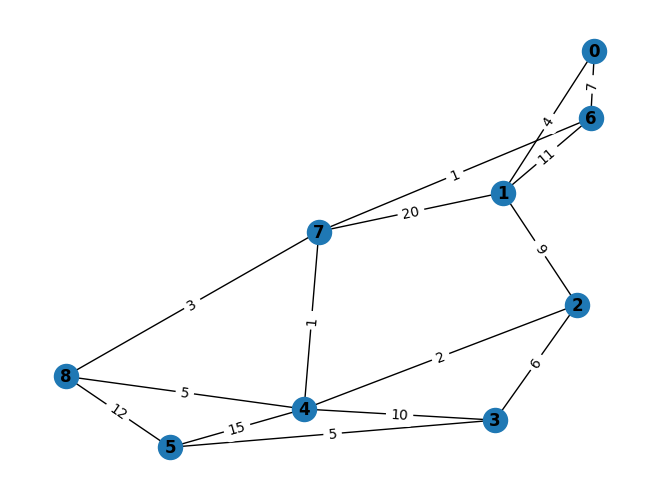

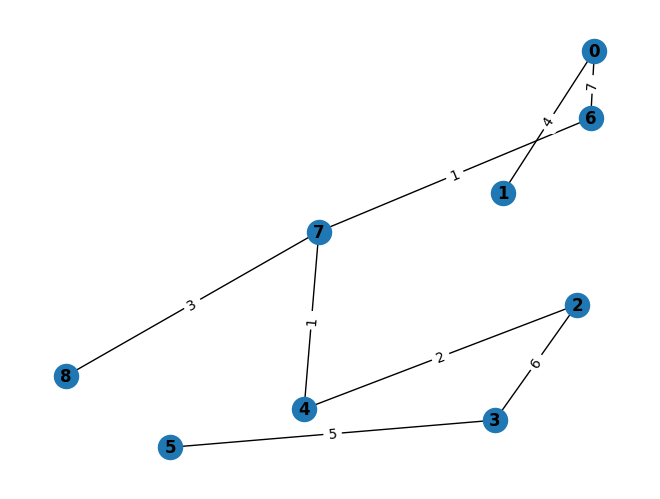

In [132]:
g1.boruvka()

In [135]:
g2 = Graph(15)
g2.add_edge(1, 6, 4)
g2.add_edge(7, 1, 13)
g2.add_edge(4, 1, 20)
g2.add_edge(9, 12, 8)
g2.add_edge(12, 8, 2)
g2.add_edge(2, 6, 4)
g2.add_edge(3, 13, 14)
g2.add_edge(6, 13, 3)
g2.add_edge(11, 8, 17)
g2.add_edge(7, 8, 9)
g2.add_edge(12, 3, 5)
g2.add_edge(6, 11, 20)
# g2.add_edge(10, 1, 3)
# g2.add_edge(5, 1, 16)
# g2.add_edge(7, 11, 12)
# g2.add_edge(10, 5, 3)
# g2.add_edge(4, 5, 19)
# g2.add_edge(3, 14, 20)
# g2.add_edge(11, 6, 16)
# g2.add_edge(14, 12, 9)
# g2.add_edge(7, 12, 19)
# g2.add_edge(6, 9, 7)
# g2.add_edge(1, 4, 11)
# g2.add_edge(11, 14, 3)

In [136]:
g2.boruvka()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\pedro\AppData\Local\Temp\ipykernel_21192\2797364196.py", line 1, in <module>
    g2.boruvka()
  File "C:\Users\pedro\AppData\Local\Temp\ipykernel_21192\23471802.py", line -1, in boruvka
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\ultratb.py", line 1396, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\pedro\AppData\Roaming\Python\Python310\site-packages\IPython\core\ultratb.py", l